In [1]:
import numpy as np
import torch
from torchvision import transforms
from PIL import Image
torch.set_printoptions(edgeitems=2, threshold=50)

C:\Users\rando\anaconda3\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: Could not find module 'C:\Users\rando\anaconda3\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


In [2]:
#Problem 1

In [3]:

import imageio
import os

allImage = []
tensorTransform = transforms.ToTensor()

data_dir = 'C:/Users/rando/Desktop/Real Time ML/HW1'
filenames = [name for name in os.listdir(data_dir)
             if os.path.splitext(name)[-1] == '.jpg']
for i, filename in enumerate(filenames):
    img_arr = imageio.imread(os.path.join(data_dir, filename))
    print(filename)
    img_t = tensorTransform(img_arr)
    allImage.append(img_t)

blueFlower.jpg
Butterfly.jpg
Leaf.jpg
redCar.jpg
rose.jpg
watermelon.jpg


In [4]:
allMeans = []

for i in allImage:
    allMeans.append(torch.mean(i, dim = [1,2]))

In [5]:
allMeans

[tensor([0.3147, 0.2865, 0.6514]),
 tensor([0.6820, 0.7546, 0.8338]),
 tensor([0.5605, 0.9004, 0.5297]),
 tensor([0.3722, 0.2652, 0.2559]),
 tensor([0.4257, 0.1407, 0.1347]),
 tensor([0.4855, 0.6238, 0.5233])]

In [6]:
# Problem 2

In [7]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [8]:
def model(t_u, w2, w1, b):
    return w2 * t_u ** 2 + w1 * t_u + b

In [9]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [10]:
w2 = torch.ones(())
w1 = torch.ones(())
b = torch.zeros(()) 
t_p = model(t_u, w2, w1, b)
t_p

tensor([1310.1901, 3180.7100, 3445.4399, 6789.5103, 3225.9900, 2440.1101,
        1183.1101,  497.0399, 2390.9600, 3708.5601, 4746.9600])

In [11]:
loss = loss_fn(t_p, t_c)
loss

tensor(11709471.)

In [12]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
    return dsq_diffs

In [13]:
def dmodel_dw2(t_u, w2, w1, b):
    return t_u ** 2

In [14]:
def dmodel_dw1(t_u, w2, w1, b):
    return t_u

In [15]:
def dmodel_db(t_u, w2, w1, b):
    return 1.0

In [16]:
def grad_fn(t_u, t_c, t_p, w2, w1, b):
    dloss_tdp = dloss_fn(t_p, t_c)
    dloss_dw2 = dloss_tdp * dmodel_dw2(t_u, w2, w1, b)
    dloss_dw1 = dloss_tdp * dmodel_dw1(t_u, w2, w1, b)
    dloss_db = dloss_tdp * dmodel_db(t_u, w2, w1, b)
    return torch.stack([dloss_dw2.sum(), dloss_dw1.sum(), dloss_db.sum()])

In [17]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w2, w1, b = params
        
        t_p = model(t_u, w2, w1, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w2, w1, b)
        
        params = params - learning_rate * grad
        
        if (epoch % 500) == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
              
    return params

In [18]:
t_un = t_u *0.1
params = training_loop(5000, 0.0001, torch.tensor([1.0, 1.0, 0.0]), t_un, t_c)

Epoch 500, Loss 10.708597
Epoch 1000, Loss 8.642083
Epoch 1500, Loss 7.171005
Epoch 2000, Loss 6.123476
Epoch 2500, Loss 5.377228
Epoch 3000, Loss 4.845286
Epoch 3500, Loss 4.465787
Epoch 4000, Loss 4.194724
Epoch 4500, Loss 4.000802
Epoch 5000, Loss 3.861744


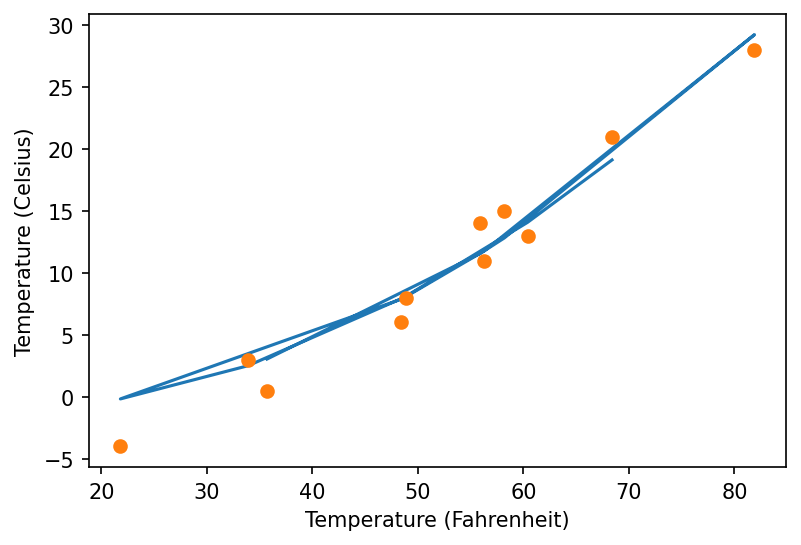

In [19]:
from matplotlib import pyplot as plt

t_p = model(t_un, *params)

fig = plt.figure(dpi=150)
plt.xlabel("Temperature (Fahrenheit)")
plt.ylabel("Temperature (Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [20]:
#Problem 3

In [21]:
import pandas as pd
import torch.optim as optim


housing = pd.DataFrame(pd.read_csv("Housing.csv")) 
housing.head() 

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [22]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price'] 
Newtrain = housing[num_vars] 
Newtrain.head() 

,area,bedrooms,bathrooms,stories,parking,price
0,7420,4,2,3,2,13300000
1,8960,4,4,4,3,12250000
2,9960,3,2,2,2,12250000
3,7500,4,2,2,3,12215000
4,7420,4,1,2,2,11410000


In [23]:
numpyArray = Newtrain.to_numpy()
inputArray = numpyArray[:, 0:5]
outputArray = numpyArray[:, 5]

inputTorch = torch.tensor(inputArray)
outputTorch = torch.tensor(outputArray)
inputTorch_n = 0.1 * inputTorch
outputTorch_n = 0.1 * outputTorch

In [24]:
def modelHousing(area, bedrooms, bathrooms, stories, parking, w5, w4, w3, w2, w1, b):
    return area * w5 + bedrooms * w4 + bathrooms * w3 + stories * w2 + parking * w1 + b

In [25]:
def lossHousing(prediction, output):
    squared_diffs = (prediction - output)**2
    return squared_diffs.mean()

In [26]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learningRate = 0.000003
optimizer = optim.SGD([params], lr = learningRate)

In [27]:
loss = lossHousing(modelHousing(inputTorch_n[:,0],inputTorch_n[:,1],inputTorch_n[:,2],inputTorch_n[:,3],inputTorch_n[:,4], *params), outputTorch)
loss.backward()
optimizer.step()

In [28]:
def housingLoop(numEpochs, optimizer, params, inputTorch, outputTorch):
    for epoch in range(1, numEpochs + 1):
        t_p = modelHousing(inputTorch_n[:,0],inputTorch_n[:,1],inputTorch_n[:,2],inputTorch_n[:,3],inputTorch_n[:,4], *params)
        loss = lossHousing(t_p, outputTorch)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
            
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

In [29]:
housingLoop(5000, optimizer, params, inputTorch_n, outputTorch)

Epoch 500, Loss 3345738629120.000000
Epoch 1000, Loss 3344727801856.000000
Epoch 1500, Loss 3343717498880.000000
Epoch 2000, Loss 3342707982336.000000
Epoch 2500, Loss 3341699252224.000000
Epoch 3000, Loss 3340691832832.000000
Epoch 3500, Loss 3339685199872.000000
Epoch 4000, Loss 3338680139776.000000
Epoch 4500, Loss 3337675603968.000000
Epoch 5000, Loss 3336672116736.000000


tensor([ 8535.5977,  4086.2283,  2301.7175,  3584.4766,   913.8885, 10768.3008],
       requires_grad=True)

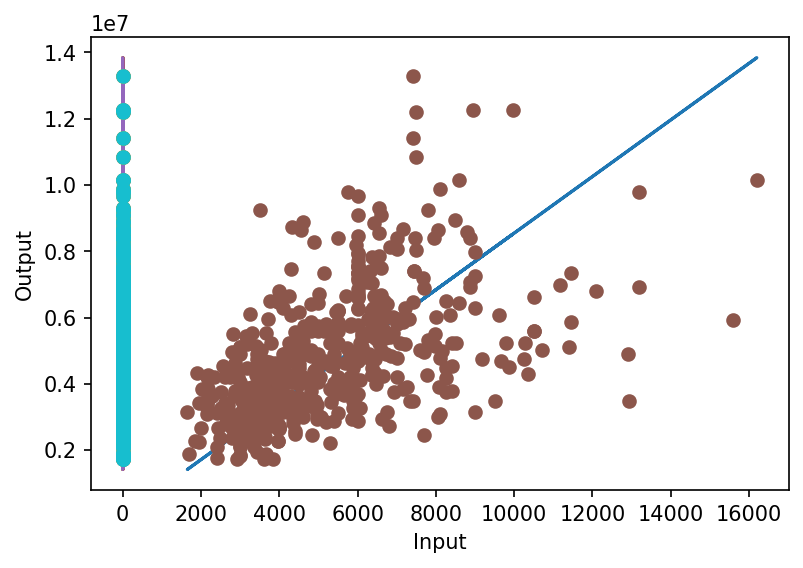

In [30]:
t_p = modelHousing(inputTorch_n[:,0],inputTorch_n[:,1],inputTorch_n[:,2],inputTorch_n[:,3],inputTorch_n[:,4], *params)

fig = plt.figure(dpi=150)
plt.xlabel("Input")
plt.ylabel("Output")
plt.plot(inputTorch.numpy(), t_p.detach().numpy())
plt.plot(inputTorch.numpy(), outputTorch.numpy(), 'o')